In [ ]:
import tensorflow as tf
print(tf.__version__)
import os
os.environ["CUDA_VISIBLE_DEVICES"] = "0"
print(f"Number of GPUs available: {len(tf.config.list_physical_devices('GPU'))}")
print(f"Number of CPUs available: {len(tf.config.list_physical_devices('CPU'))}")

2.19.0
Number of GPUs available: 0
Number of CPUs available: 1


In [1]:
from tensorflow.keras.datasets import mnist
(X_train,y_train), (X_test,y_test) = mnist.load_data()

print(f"Training data {X_train.shape}")
print(f"Testing data {X_test.shape}")

Training data (60000, 28, 28)
Testing data (10000, 28, 28)


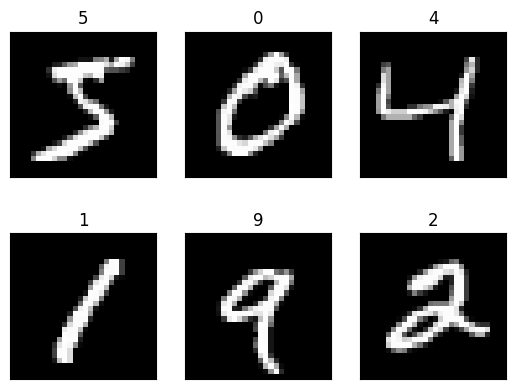

In [9]:
import matplotlib.pyplot as plt
import warnings
import numpy as np
warnings.filterwarnings('ignore')

for i in range(6):
    ax = plt.subplot(2,3,i+1,xticks=[],yticks=[])
    ax.imshow(X_train[i], cmap='gray')
    ax.set_title(f"{y_train[i]}")

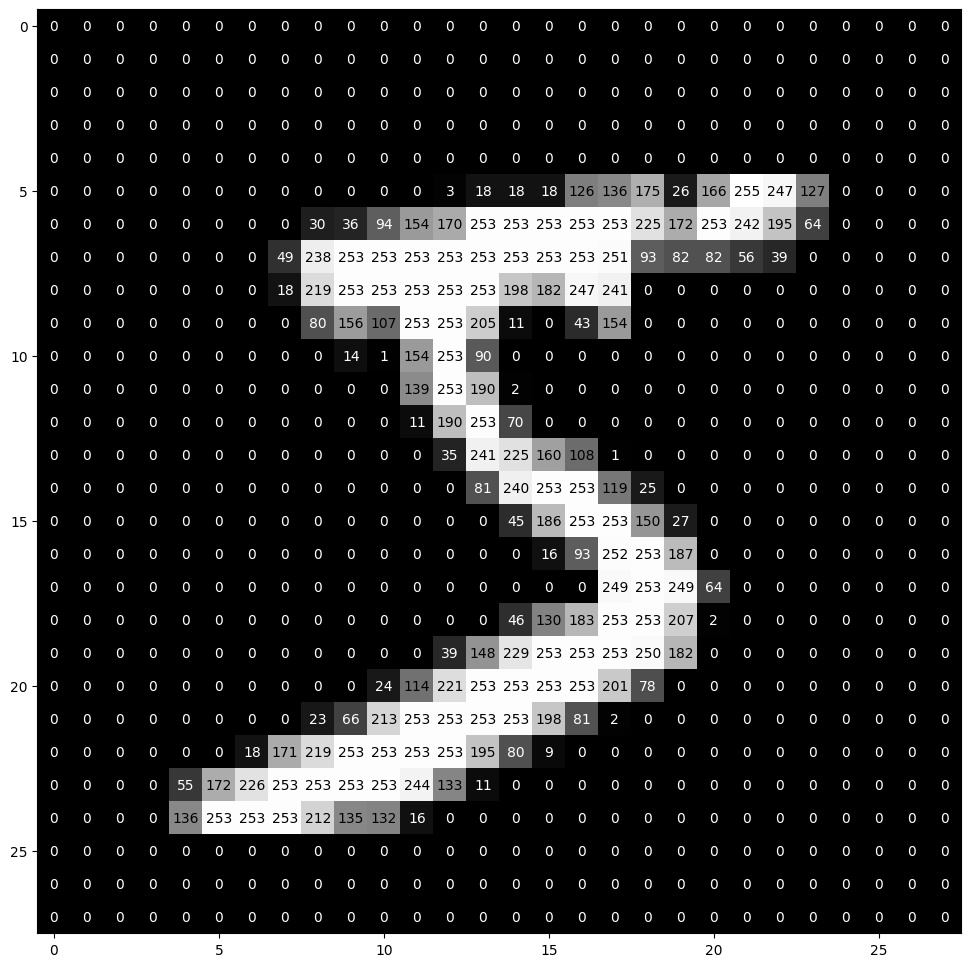

In [11]:
def visualize_input(img, ax):
    ax.imshow(img, cmap='gray')
    width, height = img.shape
    thresh = img.max()/2.5

    for x in range(width):
        for y in range(height):
            ax.annotate(str(round(img[x][y],2)), xy=(y,x),
                        horizontalalignment='center',
                        verticalalignment='center',
                        color='white' if img[x][y]<thresh else 'black')
            
fig = plt.figure(figsize = (12,12))
ax = fig.add_subplot(111)
visualize_input(X_train[0], ax)

In [ ]:
# rescale to have values within 0 - 1 range [0,255] --> [0,1]
X_train = X_train.astype('float32')/255
X_test = X_test.astype('float32')/255
print(f"Training data {X_train.shape}")

Training data (60000, 28, 28)
Training data (60000, 28, 28)


In [8]:
#Preprocess the labels: Encode Categorical Integer Labels Using a One-Hot Scheme

from tensorflow.keras.utils import to_categorical

num_classes =10
print(y_train[:15])

print(y_train.ndim)

if y_train.ndim==1:
    y_train = to_categorical(y_train,num_classes)
    y_test = to_categorical(y_test,num_classes)
else:
    print('OHE done already')

print('OHE',end='')
print(y_train[:15])

[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]]
2
OHE done already
OHE[[0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [1. 0. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 0. 0. 0. 1.]
 [0. 0. 1. 0. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]
 [0. 0. 0. 1. 0. 0. 0. 0. 0. 0.]
 [0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]
 [0. 1. 0. 0. 0. 0. 

In [9]:
#Reshape data to fit our CNN (and input_shape)
img_rows, img_cols = 28, 28
X_train = X_train.reshape(X_train.shape[0],img_rows,img_cols,1)
X_test = X_test.reshape(X_test.shape[0],img_rows,img_cols,1)

input_shape = (img_rows, img_cols, 1)

In [11]:
#Model Architecture

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D,MaxPooling2D,Flatten,Dense,Dropout

model = Sequential()

#Conv1
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

#Conv2
model.add(Conv2D(32,kernel_size=(3,3),padding='same',activation='relu',input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2,2)))

#Flatten
model.add(Flatten())

#Dense1
model.add(Dense(64,activation='relu'))
model.add(Dropout(0.5))
#Dense2 
model.add(Dense(10,activation='softmax'))
model.add(Dropout(0.5))

model.summary()


c:\Users\Debdutta Chatterjee\Work\Project\Python\AI_ML_DS_GenAI_Portfolio\.venv\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:113: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 32)     │         9,248 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 32)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 1568)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 64)             │       100,416 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │           650 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 10)             │             0 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 110,634 (432.16 KB)

 Trainable params: 110,634 (432.16 KB)

 Non-trainable params: 0 (0.00 B)

In [13]:
#Compile the Model
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

#Train the Model
from tensorflow.keras.callbacks import EarlyStopping, ModelCheckpoint
early_stopping = EarlyStopping(monitor='val_loss', patience=3, verbose=1)
model_checkpoint = ModelCheckpoint(filepath='output/model.h5',save_best_only=True,verbose=1)

history = model.fit(
X_train,y_train,
batch_size=128,
epochs=10,
callbacks =[early_stopping,model_checkpoint],
shuffle=True,
validation_data = (X_test,y_test)
)

Epoch 1/10
466/469 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.3811 - loss: nan
Epoch 1: val_loss improved from inf to 0.11682, saving model to output/model.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 7s 11ms/step - accuracy: 0.3816 - loss: nan - val_accuracy: 0.9639 - val_loss: 0.1168
Epoch 2/10
464/469 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4789 - loss: nan
Epoch 2: val_loss improved from 0.11682 to 0.07696, saving model to output/model.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4790 - loss: nan - val_accuracy: 0.9748 - val_loss: 0.0770
Epoch 3/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4856 - loss: nan
Epoch 3: val_loss improved from 0.07696 to 0.05975, saving model to output/model.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4856 - loss: nan - val_accuracy: 0.9809 - val_loss: 0.0598
Epoch 4/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4896 - loss: nan
Epoch 4: val_loss improved from 0.05975 to 0.05483, saving model to output/model.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4896 - loss: nan - val_accuracy: 0.9831 - val_loss: 0.0548
Epoch 5/10
468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4878 - loss: nan
Epoch 5: val_loss improved from 0.05483 to 0.04586, saving model to output/model.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4878 - loss: nan - val_accuracy: 0.9842 - val_loss: 0.0459
Epoch 6/10
464/469 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4879 - loss: nan
Epoch 6: val_loss improved from 0.04586 to 0.04498, saving model to output/model.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4879 - loss: nan - val_accuracy: 0.9856 - val_loss: 0.0450
Epoch 7/10
468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4937 - loss: nan
Epoch 7: val_loss improved from 0.04498 to 0.03930, saving model to output/model.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4937 - loss: nan - val_accuracy: 0.9858 - val_loss: 0.0393
Epoch 8/10
465/469 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4940 - loss: nan
Epoch 8: val_loss did not improve from 0.03930
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4940 - loss: nan - val_accuracy: 0.9868 - val_loss: 0.0398
Epoch 9/10
469/469 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4898 - loss: nan
Epoch 9: val_loss improved from 0.03930 to 0.03857, saving model to output/model.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4898 - loss: nan - val_accuracy: 0.9865 - val_loss: 0.0386
Epoch 10/10
468/469 ━━━━━━━━━━━━━━━━━━━━ 0s 9ms/step - accuracy: 0.4931 - loss: nan
Epoch 10: val_loss improved from 0.03857 to 0.03224, saving model to output/model.h5


469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 10ms/step - accuracy: 0.4931 - loss: nan - val_accuracy: 0.9890 - val_loss: 0.0322


In [15]:
# load the weights that yielded the best validation accuracy
model.load_weights('output/model.h5')

# evaluate test accuracy
score = model.evaluate(X_test, y_test, verbose=0)
accuracy = 100*score[1]

# print test accuracy
print('Test accuracy: %.4f%%' % accuracy)

Test accuracy: 98.9000%
